In [1]:
%matplotlib notebook
import numpy as np
import math

In [2]:
%run -i zbl_fit.py

In [103]:
#Enter the range of r and the number of bins:
rvalues=np.linspace(2.0,3.0,101)
zcharges=[92,8]
buckinput=[175556.161,0.176315,43.791899] #U-O
#buckinput=[50306.1000,0.161000,46.2978] #Si-O
#buckinput=[9022.7900, 0.265000, 85.0921] #O-O

In [104]:
#Calculates list of ZBL potential values with input parameters (rlist,Z1,Z2)
zblvalues=zblcalc(rvalues,*zcharges)
#Calculates list of Buckingham potential values with input parameters (rlist,A,C,rho)
buckvalues=buckcalc(rvalues,*buckinput)
#Calculates the combined potential with input parameters (rlist,Z1,Z2,A,rho,C,rm,eta)
mixpot=mixcalc(rvalues,*zcharges,*buckinput,1.7,0.15)

<IPython.core.display.Javascript object>


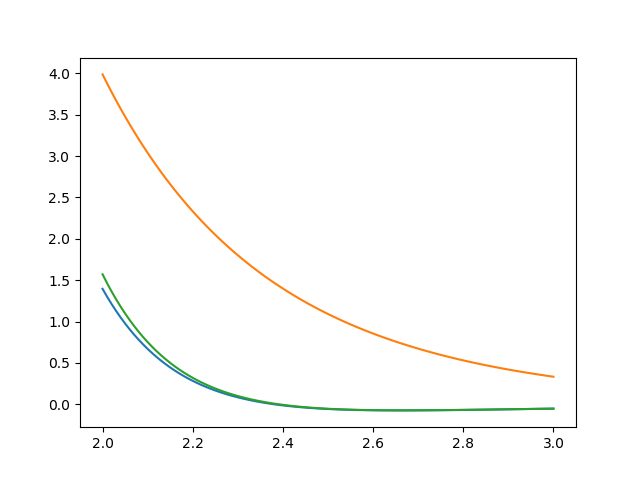

<bound method Figure.show of <matplotlib.figure.Figure object at 0x7f9972506da0>>

In [105]:
f1=plt.figure(1)
#plt.plot(rvalues,zblvalues)
plt.plot(rvalues,buckvalues)
plt.plot(rvalues,zblvalues)
plt.plot(rvalues,mixpot)
f1.show

In [106]:
diffmix=diffcalc(mixpot,rvalues)

<IPython.core.display.Javascript object>


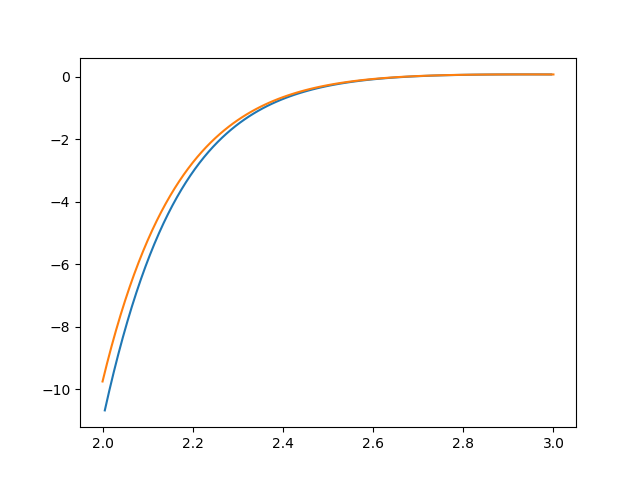

<bound method Figure.show of <matplotlib.figure.Figure object at 0x7f9972498828>>

In [107]:
f2=plt.figure(2)
plt.plot(diffmix[1],diffmix[0])
dUtot=dU(rvalues,*zcharges,*buckinput,1.15,0.05)
#for i in range(len(dUtot)):
#    dUtot[i]=dUtot[i]+1
plt.plot(rvalues,dUtot)
f2.show

<IPython.core.display.Javascript object>


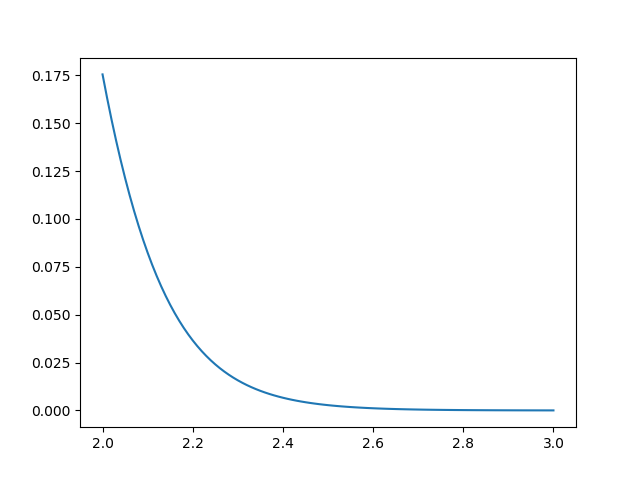

In [108]:
error=np.array(mixpot)-np.array(buckvalues)
f3=plt.figure(3)
plt.plot(rvalues,error)
f3.show()

In [109]:
ngrid=1004
rcut=10.0
delpot=rcut/(ngrid-4)
print(delpot)

0.01


<IPython.core.display.Javascript object>


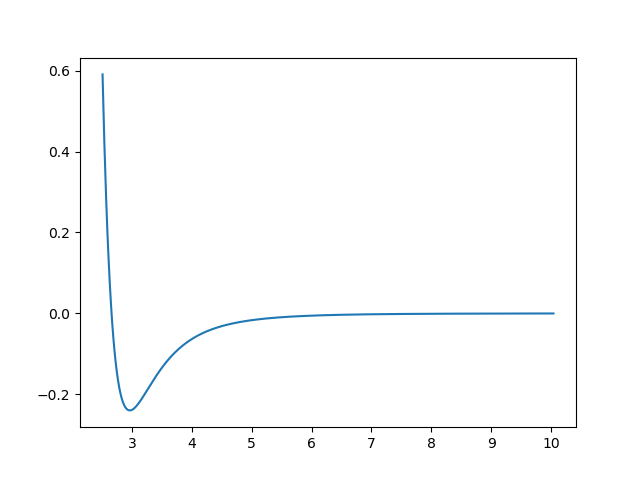

In [110]:
rvalues=[(i*delpot) for i in range(1,ngrid+1,1)]
#Calculates the combined potential with input parameters (rlist,Z1,Z2,A,C,rho,rm,eta)
mixpot=mixcalc(rvalues,*zcharges,*buckinput,1.15,0.05)
dUtot=dU(rvalues,*zcharges,*buckinput,1.15,0.05)
Forces=[]
for i in range(len(dUtot)):
    Forces.append((-rvalues[i]*dUtot[i]))
f4=plt.figure(4)
plt.plot(rvalues[250:],Forces[250:])
f4.show()

In [106]:
f=open("TABLE","w")
f.write("{0:72s}\n".format('table for Si-O interaction'))
f.write("{0:20.10f}{1:20.10f}{2:10d}\n".format(delpot,rcut,ngrid))
f.write("{0:8s}{1:8s}\n".format("Si","O"))
for i in range((ngrid+3)//4):
  sx=4*i
  nx=min(4*i+4,ngrid)
  f.write("{0:17.12e} {1:17.12e} {2:17.12e} {3:17.12e}\n".format(*mixpot[sx:nx]))
for i in range((ngrid+3)//4):
  sx=4*i
  nx=min(4*i+4,ngrid)
  f.write("{0:17.12e} {1:17.12e} {2:17.12e} {3:17.12e}\n".format(*Forces[sx:nx]))

In [107]:
print(Forces[0])

144095.83485591513


0.01


<IPython.core.display.Javascript object>


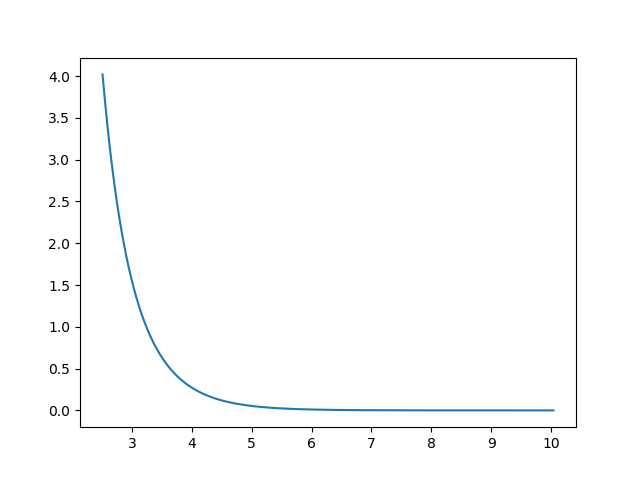

In [5]:
zcharges=[14,14]
ngrid=1004
rcut=10.0
delpot=rcut/(ngrid-4)
print(delpot)

rvalues=[(i*delpot) for i in range(1,ngrid+1,1)]
#Calculates the combined potential with input parameters (rlist,Z1,Z2,A,C,rho,rm,eta)
zblpot=[]
dzblval=[]
for r in rvalues:
    zblpot.append(zbl(*zcharges,r))
    dzblval.append(dzbl(*zcharges,r))
Forces=[]
for i in range(len(dzblval)):
    Forces.append((-rvalues[i]*dzblval[i]))

f=open("TABLEZBL","w")
f.write("{0:72s}\n".format('table for Si-Si ZBL interaction'))
f.write("{0:20.10f}{1:20.10f}{2:10d}\n".format(delpot,rcut,ngrid))
f.write("{0:8s}{1:8s}\n".format("Si","Si"))
for i in range((ngrid+3)//4):
  sx=4*i
  nx=min(4*i+4,ngrid)
  f.write("{0:17.12e} {1:17.12e} {2:17.12e} {3:17.12e}\n".format(*zblpot[sx:nx]))
for i in range((ngrid+3)//4):
  sx=4*i
  nx=min(4*i+4,ngrid)
  f.write("{0:17.12e} {1:17.12e} {2:17.12e} {3:17.12e}\n".format(*Forces[sx:nx]))
f.close()
f4=plt.figure(4)
plt.plot(rvalues[250:],Forces[250:])
f4.show()